In [34]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [35]:
def swap_circuit(cc,n):
    for qubit in range(n//2):
        cc.swap(qubit,n-1-qubit)
        
def rot_qubit(cc,n):
    for j in range(n):
        for m in range(j):
            cc.cp(-np.pi/float(2**(j-m)), m, j)
        cc.h(j)
          
def qft_degger(qc,n):
    
    swap_circuit(qc,n-1)
    rot_qubit(qc,n-1)

def ancilla_circuit(qc,n):
    
    angle=2*np.pi/3.0

    for qubit in range(n-1):
        qc.h(qubit)
    repition=1
    for qubit in range(n-1):
        for i in range(repition):
            qc.cp(angle,qubit,n-1)
        repition*=2
    

n_qubits=4
qc=QuantumCircuit(n_qubits,3)
qc.x(n_qubits-1)
ancilla_circuit(qc,n_qubits)
qft_degger(qc,n_qubits)
qc.measure(range(n_qubits-1), range(n_qubits-1))
qc.draw()

┌───┐                                                                  »
q_0: ┤ H ├─────■────────────────────────────────────────────────────────────»
     ├───┤     │                                                            »
q_1: ┤ H ├─────┼──────────■──────────■──────────────────────────────────────»
     ├───┤     │          │          │                                      »
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
q_3: ┤ X ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ┌───┐                                      ┌─┐           
«q_0: ────────────X─┤ H ├─────■───────────────■────────────────┤M├───────────
«                 │ └───┘┌────┴────┐┌───┐     │                └╥┘     ┌─┐   
«q_1: ────────────┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■──────╫──────┤M├───
«                 │      └─────────┘└───┘┌────┴────┐┌────┴────┐ ║ ┌───┐└╥┘┌─┐
«q_2: ─────■──────X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├─╫─┤ H ├─╫─┤M├
«     ┌────┴────┐                        └─────────┘└─────────┘ ║ └───┘ ║ └╥┘
«q_3: ┤ P(2π/3) ├───────────────────────────────────────────────╫───────╫──╫─
«     └─────────┘                                               ║       ║  ║ 
«c: 3/══════════════════════════════════════════════════════════╩═══════╩══╩═
«                                                               0       1  2

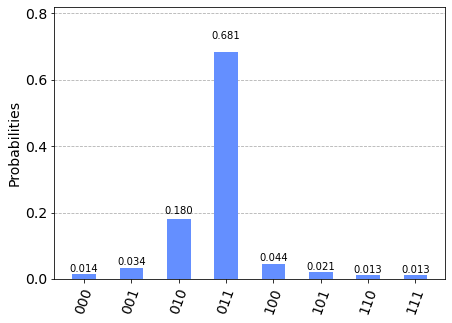

In [37]:
simulator=Aer.get_backend('qasm_simulator')
job_c=execute(qc,backend=simulator,shots=4096)
counts=job_c.result().get_counts()
plot_histogram(counts)

In [51]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_lima')
job_q = execute(qc, backend=qcomp, shots=4096)

ibmqfactory.load_account:WARNING:2021-03-05 06:50:55,764: Credentials are already in use. The existing account in the session will be replaced.


In [48]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


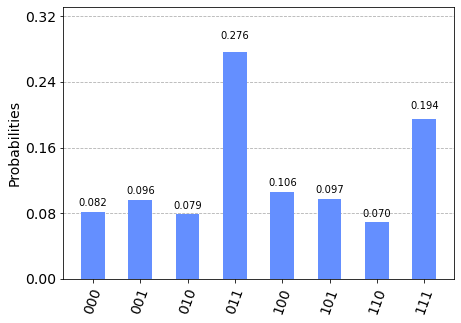

In [50]:
result_q=job_q.result()
plot_histogram(result_q.get_counts(qc))